<center>
    <span style="color:#0F53BA; font-family:serif; font-size:30px;">
        SML Classification Project: Loan Default Prediction 
    </span>
</center>

<span style="color:#0F53BA; font-family:serif; font-size:20px;">Main Objective:</span>
</br>
<span style="font-family:serif; font-size:18px;">
    The objective of this analysis is to build a model able to accurately predict the defaulting of a loan based on input data. The focus is on the model  predictability, instead of its interpretability.</br>
    For training and testing different models the Loan Default Dataset from Kaggle will be used (https://www.kaggle.com/yasserh/loan-default-dataset).
</span>


<span style="color:#0F53BA; font-family:serif; font-size:25px;"> Content </span>

1. [Data exploration](#1)
2. [Cleaning and feature engineering](#2)
3. [Classifier models](#3)
4. [Key Findings and Insights](#4)
5. [Possible flows & suggestions for next steps](#5)

<span style="font-family:serif; font-size:18px;">
    We start by exploring the dataset and forming assumptions about it, then we move to cleaning the data, feature engineering, and finally training models that are able to accurately predict and/or identify patterns in our data.
    </span>

In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id = "1" ></a>
<span style="color:#0F53BA; font-family:serif; font-size:25px;"> 
    1. Data exploration </span>

In [4]:
# Importing dataset
data = pd.read_csv('../input/loan-default-dataset/Loan_Default.csv')
print("Data shape:", data.shape)
data.columns

Data shape: (148670, 34)


Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

<span style="font-family:serif; font-size:18px;">
    The dataset we are analyzying has 148 670 observations and 34 columns, one of them being our target variable that we aim to predict -  Status.
    </span>

In [7]:
# Count the number of unique values in each column
for col in list(data):
    print('variable:', col, ' - ', data[col].nunique())
    #print(data[col].value_counts(dropna=False).to_string())

variable: ID  -  148670
variable: year  -  1
variable: loan_limit  -  2
variable: Gender  -  4
variable: approv_in_adv  -  2
variable: loan_type  -  3
variable: loan_purpose  -  4
variable: Credit_Worthiness  -  2
variable: open_credit  -  2
variable: business_or_commercial  -  2
variable: loan_amount  -  211
variable: rate_of_interest  -  131
variable: Interest_rate_spread  -  22516
variable: Upfront_charges  -  58271
variable: term  -  26
variable: Neg_ammortization  -  2
variable: interest_only  -  2
variable: lump_sum_payment  -  2
variable: property_value  -  385
variable: construction_type  -  2
variable: occupancy_type  -  3
variable: Secured_by  -  2
variable: total_units  -  4
variable: income  -  1001
variable: credit_type  -  4
variable: Credit_Score  -  401
variable: co-applicant_credit_type  -  2
variable: age  -  7
variable: submission_of_application  -  2
variable: LTV  -  8484
variable: Region  -  4
variable: Security_Type  -  2
variable: Status  -  2
variable: dtir1  -

<span style="font-family:serif; font-size:18px;">
    Given that the ID is unique for every row and year is ‘2019’ for all rows we drop those columns from our dataset, and are left with 32 variables.
    </span>

In [8]:
# Dropping the "ID" and "year" columns as they do not impact our prediction
data.drop('ID', axis=1, inplace=True)
data.drop('year', axis=1, inplace=True)
print("Data shape:", data.shape)
data.head()

Data shape: (148670, 32)


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [9]:
num_cols = data.select_dtypes('number').columns.to_list()
categ_cols = data.dtypes[data.dtypes=='object'].index.to_list()
data.dtypes.value_counts()

object     21
float64     8
int64       3
dtype: int64

<span style="font-family:serif; font-size:18px;">
    From the 32 columns left, 11 are numerical (Including "Status"), and 21 of them are categorical.
   </span>

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02
LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7.831250e+03
Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.000000e+00


In [19]:
print(data.Status.value_counts())
print(data.Status.value_counts()/data.shape[0])

0    112031
1     36639
Name: Status, dtype: int64
0    0.753555
1    0.246445
Name: Status, dtype: float64


<span style="font-size:16px;"> 
    The first thing worth noticing is that we have an unbalanced dataset, having 112 031 observations (75%) with Status 0, and only 36639 of them (25%) with status 1. 

The distribution plot of loan_amount values is skewed to the right. Most of the observations having loan_amount values less than 750000. </span>

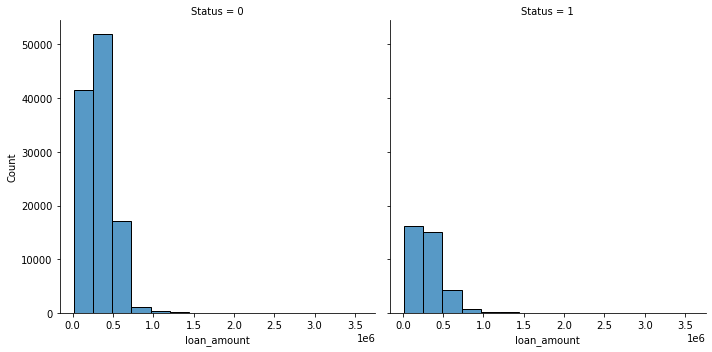

In [20]:
p = sns.displot(data, x="loan_amount", col="Status", bins=15)

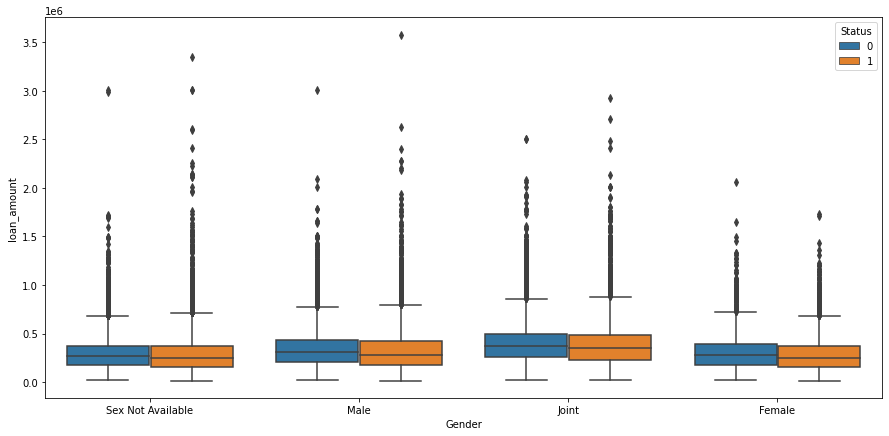

In [21]:
ax, fig = plt.subplots(figsize=[15,7])
p = sns.boxplot(x="Gender", y="loan_amount", hue="Status", data=data)

<span style="font-size:16px">
    From the box plots of the loan_amount values we can observe that the median, Q1, and Q3 are lower for the observations with Status 1 (loans that have defaulted), although there seem to be many outliers in the dataset. Therefore, we can assume that those loans that default are usually smaller than those that do not.
</span>

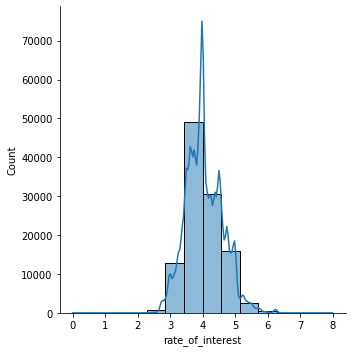

In [27]:
p = sns.displot(data[data.Status==0], x="rate_of_interest", bins=14, kde=True)

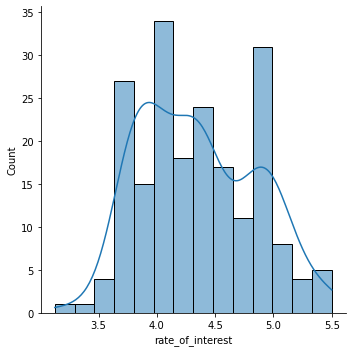

In [28]:
p = sns.displot(data[data.Status==1], x="rate_of_interest", bins=14, kde=True)

<span style="font-size:16px;">
    In the distribution plots above we can observe that the majority of the loans had a rate of interest between 3.5 and 5.
    However, among the loans that defaulted the proportion of those with a greater rate of interest is bigger.
</span>

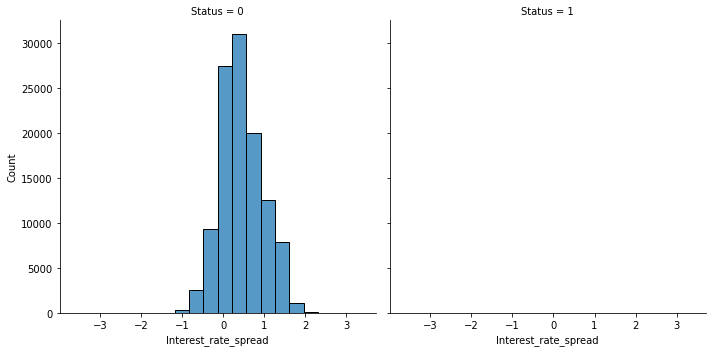

In [25]:
p = sns.displot(data, x="Interest_rate_spread", col="Status", bins=20)

<span style="font-size:16px;">
    Interest rate column has no values for the observations with Status being 1.
</span>

In [30]:
data[data.Status==1].Interest_rate_spread.unique()

array([nan])

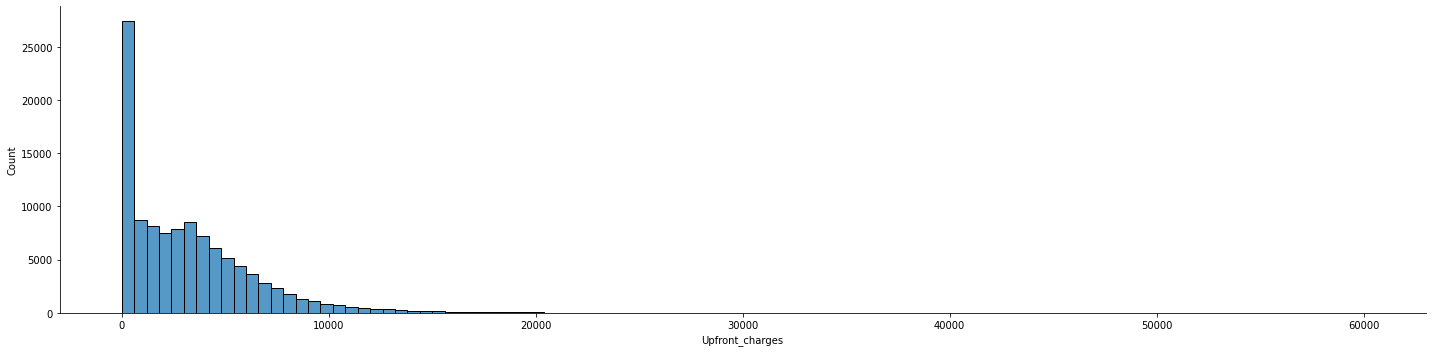

In [37]:
p = sns.displot(data[data.Status==0], x="Upfront_charges", bins=100, height=5, aspect=4)
#p.set_xticks(range(10))

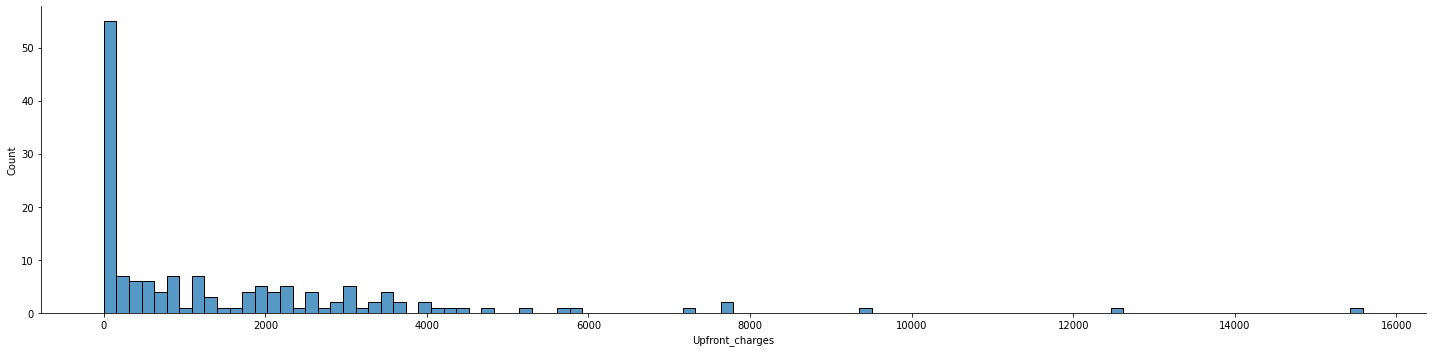

In [38]:
p = sns.displot(data[data.Status==1], x="Upfront_charges", bins=100, height=5, aspect=4)

In [70]:
print('Defaulted loans with no upfront charge: ', 
      100*data[(data.Status==1) & (pd.isnull(data.Upfront_charges) |  (data.Upfront_charges==0))].shape[0]/data[(data.Status==1)].shape[0])
print('Not-defaulted loans with no upfront charge: ', 
      100*data[(data.Status==0) & (pd.isnull(data.Upfront_charges) |  (data.Upfront_charges==0))].shape[0]/data[(data.Status==0)].shape[0])

Defaulted loans with no upfront charge:  99.72706678675728
Not-defaulted loans with no upfront charge:  21.309280467013593


In [69]:
100*data[(data.Status==0) & (pd.isnull(data.Upfront_charges) |  (data.Upfront_charges==0))].shape[0]/data[(data.Status==0)].shape[0]

21.309280467013593

<span style="font-size:16px;">
It can be observed that the majority of loans that defaulted (99,7%) had no upfront charge, while 79% of loans that didn't default had an upfront charge.
</span>

In [71]:
print("Nr of rate_of_interest NULL values:\n", data['rate_of_interest'].isnull().groupby(data['Status']).sum())
print("\nNr of Interest_rate_spread NULL values:\n", data['Interest_rate_spread'].isnull().groupby(data['Status']).sum())
print("\nNr of Upfront_charges NULL values:\n", data['Upfront_charges'].isnull().groupby(data['Status']).sum())

Nr of rate_of_interest NULL values:
 Status
0        0
1    36439
Name: rate_of_interest, dtype: int64

Nr of Interest_rate_spread NULL values:
 Status
0        0
1    36639
Name: Interest_rate_spread, dtype: int64

Nr of Upfront_charges NULL values:
 Status
0     3156
1    36486
Name: Upfront_charges, dtype: int64


<span style="font-size:16px;">
    These features have a lot of missing values for observations with Status=1. 
    </span>

(0.0, 5000000.0)

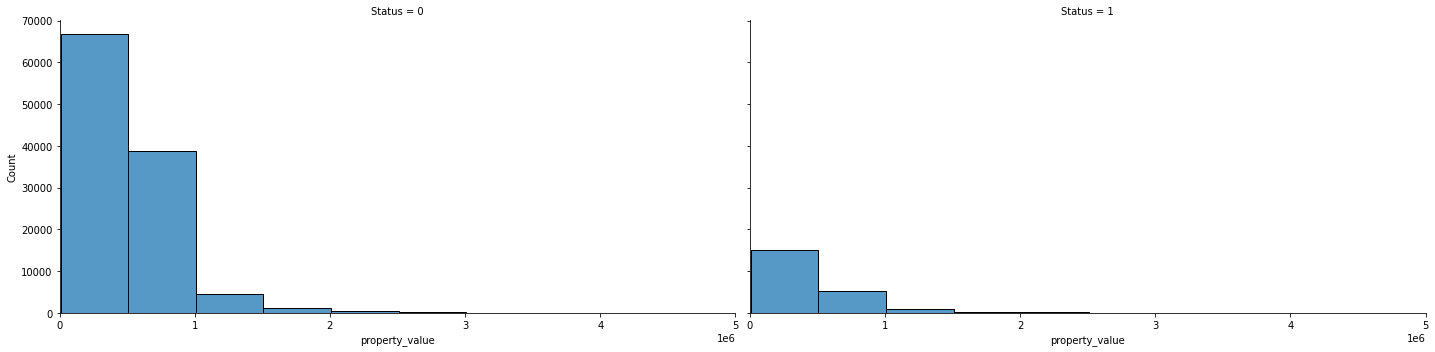

In [90]:
p = sns.displot(data, x="property_value", col="Status", bins=33, height=5, aspect=2)
plt.xlim(0, 5000000)

In [128]:
print("Missing property values for not-defaulted loans:",
      data[(data.Status==0) & (pd.isnull(data.property_value))].loan_amount.count(), ' - ',
      "{:.2%}".format(data[(data.Status==0) & (pd.isnull(data.property_value))].loan_amount.count()/data[(data.Status==0) ].shape[0]))
print("Missing property values for defaulted loans:",
      data[(data.Status==1) & (pd.isnull(data.property_value))].loan_amount.count(), ' - ',
     "{:.2%}".format(data[(data.Status==1) & (pd.isnull(data.property_value))].loan_amount.count()/data[(data.Status==1) ].shape[0]))
print(data[pd.isnull(data.property_value)].loan_amount.count())

Missing property values for not-defaulted loans: 2  -  0.00%
Missing property values for defaulted loans: 15096  -  41.20%
15098


<span style="font-size: 16px">
    The majority of loans were associated with a property valued at 1,000,000 USD or less.    
    However, 41% of the defaulted loans had no property value associated.
</span>

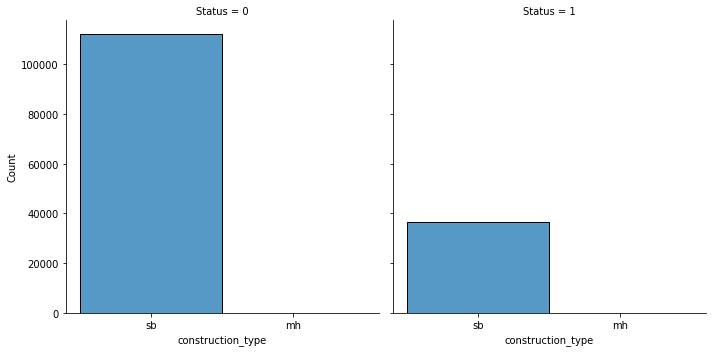

In [130]:
p = sns.displot(data, x="construction_type", col="Status", bins=20)

In [131]:
print(data.loc[data.Status==0].construction_type.value_counts())
print(data.loc[data.Status==1].construction_type.value_counts())

sb    112031
Name: construction_type, dtype: int64
sb    36606
mh       33
Name: construction_type, dtype: int64


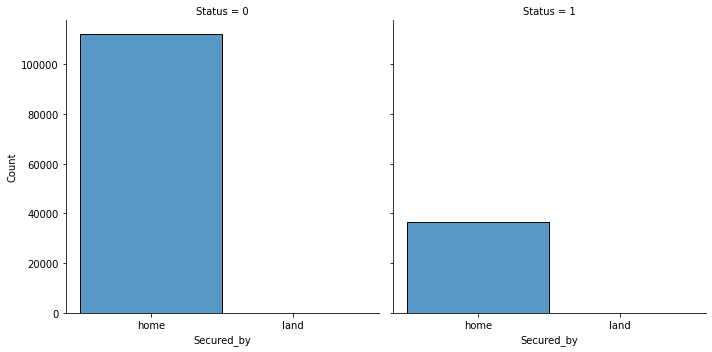

In [135]:
p = sns.displot(data, x="Secured_by", col="Status", bins=20)

In [136]:
print(data.loc[data.Status==0].Secured_by.value_counts())
print(data.loc[data.Status==1].Secured_by.value_counts())

home    112031
Name: Secured_by, dtype: int64
home    36606
land       33
Name: Secured_by, dtype: int64


In [ ]:
p = sns.displot(data, x="total_units", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="income", col="Status", bins=10)

In [ ]:
p = sns.displot(data, x="credit_type", col="Status", bins=20)

In [ ]:
print(data.loc[data.Status==0].credit_type.value_counts())
print(data.loc[data.Status==1].credit_type.value_counts())

<span style="font-size:16px;">
The credit types of those loans that defaulted seem to be different than of those that did not default.
While the majority of defaulted loans were EQUI, only one loan of type EQUI did not default.
</span>

In [ ]:
p = sns.displot(data, x="Credit_Score", col="Status", bins=10)

In [ ]:
p = sns.displot(data, x="co-applicant_credit_type", col="Status", bins=20)

<span style="font-size:16px;">
Another difference between the defaulted loans and not-defaulted ones is co-applicant credit type.
</span>

In [ ]:
p = sns.displot(data, x="age", col="Status")

In [ ]:
p = sns.displot(data, x="submission_of_application", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="LTV", col="Status", bins=8)

In [ ]:
p = sns.displot(data, x="Region", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="Security_Type", col="Status")

In [ ]:
p = sns.displot(data, x="dtir1", col="Status", bins=10)

In [ ]:
p = sns.displot(data, x="loan_limit", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="Gender", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="approv_in_adv", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="loan_type", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="loan_purpose", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="Credit_Worthiness", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="open_credit", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="business_or_commercial", col="Status", bins=20)

In [ ]:
p = sns.displot(data, x="loan_limit", col="Status", bins=20)

In [ ]:
sns.displot(data, y="loan_amount", hue="Gender", col="Status", multiple="stack", bins=15, height=8)

In [ ]:
sns.displot(data, y="Credit_Score", hue="Status", multiple="dodge", bins=20, height=7, aspect=11.7/8.27)

In [ ]:
# Plot variables against each other
sns.pairplot(data.loc[:, num_cols], 
             plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
We observe a stronger correlation between Status and Upfront Charges.

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,5))
ax1.scatter(x=data.LotArea, y=data.SalePrice)
ax2.scatter(x=data.LotShape, y=data.SalePrice)
ax3.scatter(x=data.LotFrontage, y=data.SalePrice)
plt.show();

In [ ]:
sns.catplot(x="SalePrice", y="Neighborhood", data=data,
            kind="violin", height=5)

In [ ]:
sns.catplot(x="SalePrice", y="MSZoning", data=data, 
            kind="violin")

In [ ]:
sns.catplot(x="SalePrice", y="Alley", data=data, 
            height=5, kind="violin")

In [ ]:
sns.catplot(x="SalePrice", y="Street", data=data, 
            orient="h", height=5, aspect=1, palette="tab10", kind="violin", dodge=True, cut=0, bw=.2)

In [ ]:
sns.catplot(x="SalePrice", y="Utilities", data=data, kind="violin")

In [ ]:
sns.catplot(x="SalePrice", y="HouseStyle", data=data, kind="violin")

<a id = "2" ></a>
<span style="color:#0F53BA; font-family:serif; font-size:25px;"> 
    2. Cleaning and feature engineering </span>

<span style = "font-size:20px; font-family:serif;">
It is important to perform data cleaning because messy data will lead to unreliable outcomes. We check for missing values, duplicate data, unnecessary data, inconsistent data and typos, and outliers.
If necessary, we encode categorical features and transform skewed variables
</span>

<span style="color:#0F53BA; font-family:serif; font-size:18px;"> 
    2.1. Missing values </span>

In [132]:
print('Missing values for each variable:')
for col in list(data):
    print(col, ' - ', pd.isnull(data[col]).sum(), ', ', "{:.2%}".format(pd.isnull(data[col]).sum()/data.shape[0]))

Missing values for each variable:
loan_limit  -  3344 ,  2.25%
Gender  -  0 ,  0.00%
approv_in_adv  -  908 ,  0.61%
loan_type  -  0 ,  0.00%
loan_purpose  -  134 ,  0.09%
Credit_Worthiness  -  0 ,  0.00%
open_credit  -  0 ,  0.00%
business_or_commercial  -  0 ,  0.00%
loan_amount  -  0 ,  0.00%
rate_of_interest  -  36439 ,  24.51%
Interest_rate_spread  -  36639 ,  24.64%
Upfront_charges  -  39642 ,  26.66%
term  -  41 ,  0.03%
Neg_ammortization  -  121 ,  0.08%
interest_only  -  0 ,  0.00%
lump_sum_payment  -  0 ,  0.00%
property_value  -  15098 ,  10.16%
construction_type  -  0 ,  0.00%
occupancy_type  -  0 ,  0.00%
Secured_by  -  0 ,  0.00%
total_units  -  0 ,  0.00%
income  -  9150 ,  6.15%
credit_type  -  0 ,  0.00%
Credit_Score  -  0 ,  0.00%
co-applicant_credit_type  -  0 ,  0.00%
age  -  200 ,  0.13%
submission_of_application  -  200 ,  0.13%
LTV  -  15098 ,  10.16%
Region  -  0 ,  0.00%
Security_Type  -  0 ,  0.00%
Status  -  0 ,  0.00%
dtir1  -  24121 ,  16.22%


In [133]:
# Checking number of missing values in every column
miss_val = data.isnull().sum().sort_values(ascending=False)
tmp = pd.concat([miss_val, data.dtypes], axis=1)
print(tmp.loc[tmp[0]>0])

print("\nColumns that contain missing values:")
print(tmp.loc[tmp[0]>0, 1].value_counts())

                               0        1
Upfront_charges            39642  float64
Interest_rate_spread       36639  float64
rate_of_interest           36439  float64
dtir1                      24121  float64
LTV                        15098  float64
property_value             15098  float64
income                      9150  float64
loan_limit                  3344   object
approv_in_adv                908   object
submission_of_application    200   object
age                          200   object
loan_purpose                 134   object
Neg_ammortization            121   object
term                          41  float64

Columns that contain missing values:
float64    8
object     6
Name: 1, dtype: int64


In [ ]:
#39642/data.shape[0]
data.term.value_counts()      

<span style="font-size:20px; font-family:serif;">
    14 columns of our dataset contain missing values, 8 of them representing numerical features, and 6 - categorical features.
    We can handle these missing values differently for each column taking into account its context.
</span>   

<span style="font-size:20px; font-family:serif;">    
>> Upfront_charges
Even though 26% of values are NULL, this feaure can be valueable for our prediction, and, therefore, we will keep it in our dataset.
    A NULL value indicates that there wasn't an upfront charge, and we could replace it with "0".            
</span>      

<span style="font-size:20px; font-family:serif;">    
>> Interest_rate_spread
...          
</span>      

<span style="font-size:20px; font-family:serif;">    
>> The missing values of the categorical features ("loan_limit", "approv_in_adv", "submission_of_application", "age", "loan_purpose", "Neg_ammortization") could be replaced with the most common value of each feature.
</span>     

In [ ]:
# Handling missing values
nr_nulls = data.isnull().sum().sort_values(ascending=False)
cols_with_nulls = [nr_nulls.index[i] for i in range(len(nr_nulls)) if (nr_nulls>0)[i]]
cols_with_nulls

In [ ]:
# Imputing Missing Values - mask the categorical data
for column in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 
               'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
               'BsmtFinType2', 'MasVnrType'):
    data[column].fillna('None', inplace=True)
    
data['Electrical'].fillna(data['Electrical'].mode().values[0], inplace=True)


# Imputing Missing Values - mask the numeric data    
for column in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtHalfBath', 'BsmtFullBath', 'MasVnrArea', ):
    data[column].fillna(0, inplace=True)

data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

data.isnull().sum().sort_values(ascending=False)

<span style="color:#0F53BA; font-family:serif; font-size:18px;"> 
    2.2 Outliers </span>

In [ ]:
# Handling outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
data['GrLivArea'].hist(ax=ax1)
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', ax=ax2);

It can be observed that for the GrLivArea variable (Above ground living area square feet) there is not a lot of frequency beyond 4000.

In [ ]:
data = data.drop(data[(data['GrLivArea']>4000)].index)
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice');

<span style="color:#0F53BA; font-family:serif; font-size:18px;"> 
    2.3 Remove unnecessary data </span>

In [ ]:
# Create a new feature "TotalArea" and plot it against the target variable
data.loc[:,["TotalArea"]] = (data.LotFrontage + data.LotArea + 
                         data.MasVnrArea + data.TotalBsmtSF + 
                         data.GrLivArea + data.GarageArea + data.WoodDeckSF + data.OpenPorchSF + 
                        data.EnclosedPorch + data['3SsnPorch'] + data.ScreenPorch + data.PoolArea)
sns.scatterplot(data=data, x='TotalArea', y='SalePrice');

In [ ]:
# Plot variables against each other
sns.pairplot(data.loc[:, ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalArea','SalePrice']], 
             plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
# Create a smaller data frame with features that we observed to have an impact on Price
orig_data = data
cols = ['OverallQual', 'OverallCond', 'YearRemodAdd',
        'TotalArea', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice']
data = data.loc[:, cols]
data.head()

In [ ]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

<span style="color:#0F53BA; font-family:serif; font-size:18px;"> 
    3.3 Encoding categorical features </span>

In [ ]:
# Converting categorical variables to dummies
cols_to_encode = [data.columns.to_list()[i] for i in range(len(data.columns.to_list())) if data.columns.to_list()[i] in string_cols]
data = pd.get_dummies(data, columns = cols_to_encode, drop_first=True)

In [ ]:
data.describe().T

<span style="color:#0F53BA; font-family:serif; font-size:18px;"> 
    2.4 Transforming skewed variables </span>

To meet the assumptions of  linear regression the variables need to be transformed.
(Calculating log transformations and polynomial features, encoding a categorical variable, and scaling a variable.)

In [ ]:
# Transforming skewed variables
num_cols = data.select_dtypes('number').columns

skew_limit = 0.75
skew_vals = data[num_cols].skew()

skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
data['SalePrice'].hist(ax=ax1)
data['SalePrice'].apply(np.log1p).hist(ax=ax2);

for col in skew_cols.index.values:
    if col == 'SalePrice':
        continue
    data[col] = data[col].apply(np.log1p)


<span style="color:#0F53BA; font-family:serif; font-size:18px;"> 
    3.6 Feature Engineering </span>

<a id = "3" ></a>
<span style="color:#0F53BA; font-family:serif; font-size:25px;"> 
    3. Classifier models </span>


In [ ]:
from sklearn.model_selection import train_test_split
X = data[['OverallQual', 'OverallCond', 'YearRemodAdd', 'TotalArea',
       'TotRmsAbvGrd', 'GarageCars']]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

<span style="color:#0F53BA; font-family:serif; font-size:20px;"> 
    6.1. Simple Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lrn_rmse = rmse(y_test, y_pred)
print(lrn_rmse)

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

<span style="color:#0F53BA; font-family:serif; font-size:20px;"> 
    6.2. Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)
X_poly = pf.fit_transform(X_train)

pr = LinearRegression()
pr = pr.fit(X_poly, y_train)
y_pred = pr.predict(pf.transform(X_test))

pr_rmse = rmse(y_test, y_pred)
print(pr_rmse)

<span style="color:#0F53BA; font-family:serif; font-size:20px;"> 
    6.3. Regularization regression: Ridge

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_train, y_train)
y_pred = ridgeCV.predict(X_test)

ridgeCV_rmse = rmse(y_test, y_pred)
print(ridgeCV.alpha_, ridgeCV_rmse)

<span style="color:#0F53BA; font-family:serif; font-size:20px;"> 
    6.4. Regularization regression: lasso

In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)

<span style="color:#0F53BA; font-family:serif; font-size:20px;"> 
    6.5. Regularization regression: ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

In [ ]:
rmse_vals = [lrn_rmse, pr_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Poly', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

<a id = "4" ></a>
<span style="color:#0F53BA; font-family:serif; font-size:25px;"> 
    4. Key Findings and Insights </span>

<a id = "5" ></a>
<span style="color:#0F53BA; font-family:serif; font-size:25px;"> 
    5. Possible flows & suggestions for next steps in analysing this data </span>


Brief description of the data set and a summary of its attributes

Initial plan for data exploration

Actions taken for data cleaning and feature engineering

Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

Formulating at least 3 hypothesis about this data

Conducting a formal significance test for one of the hypotheses and discuss the results 

Suggestions for next steps in analyzing this data

A paragraph that summarizes the quality of this data set and a request for additional data if needed